In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams["patch.force_edgecolor"] = True

In [28]:
new_customer = pd.read_excel('data.xlsx',sheet_name='new_customer')

In [29]:
new_customer.head()

,Customer ID,Status,Country,Tier,days_ago_joined,age,Point,Upgrade Flag,accum_points_used,avg_point_used_per_year,sale_type,days_ago_last_paid,owes,arrivals,last_arrival_days_ago
0,1005,Closed,Hungary,Jade,2668,40,15000.0,No Upgrade,119065,16289,Installment Plan,125,0.00,9,462
1,1007,CxlBadDebt,Malaysia,Jade,2668,44,5000.0,No Upgrade,7200,985,Installment Plan,1882,0.57,1,1986
2,1106,Closed,Hong Kong,Jade,2660,40,5000.0,No Upgrade,18165,2493,Installment Plan,855,0.00,3,946
3,1130,Closed,United States of America,Jade,2660,38,5000.0,No Upgrade,13320,1828,Installment Plan,852,0.00,3,1979
4,1218,Closed,United Kingdom,Jade,2660,70,5000.0,No Upgrade,0,0,Cash,868,0.00,5,1027


In [31]:
sns.set_style('whitegrid')

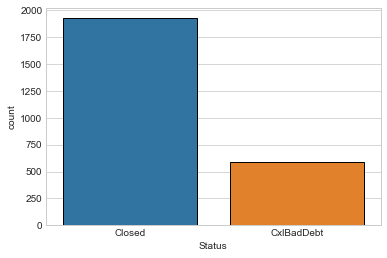

In [39]:
sns.countplot(x='Status',data=new_customer)

c:\users\mojiway\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


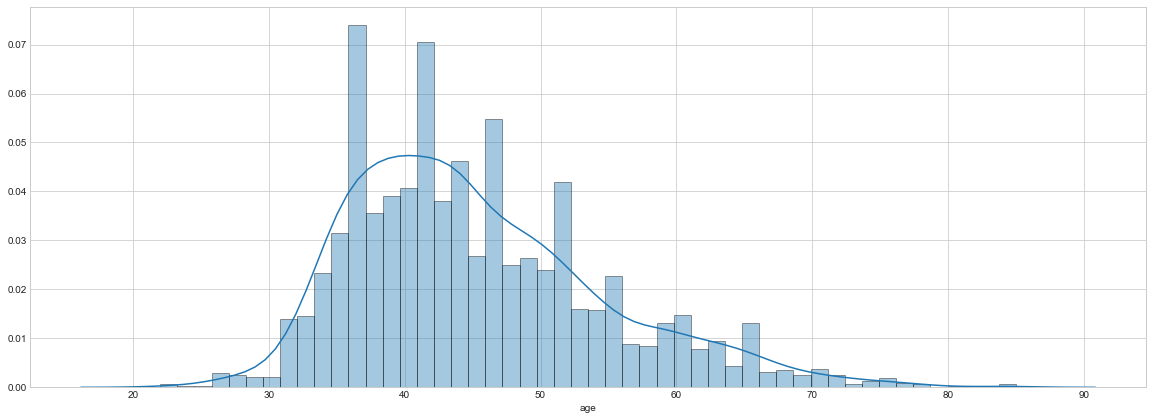

In [46]:
plt.figure(figsize=(20,7))
sns.distplot(new_customer['age'],bins=50)


c:\users\mojiway\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


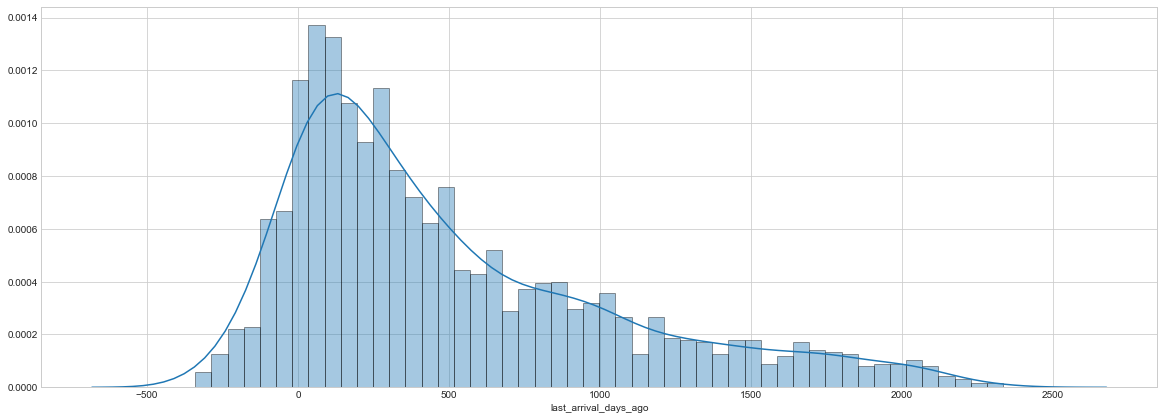

In [48]:
plt.figure(figsize=(20,7))
sns.distplot(new_customer['last_arrival_days_ago'],bins=50)

In [54]:
Country = pd.get_dummies(new_customer['Country'],drop_first=True)

In [55]:
Country.head()

,Austria,Bahrain,Bangladesh,Belarus,Belgium,Brunei Darussalam,Cambodia,Canada,Chile,China,...,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,Turkey,United Arab Emirates,United Kingdom,United States of America,Vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
churner = pd.get_dummies(new_customer['Status'],drop_first=True)

In [61]:
churner.head()

,CxlBadDebt
0,0
1,1
2,0
3,0
4,0


In [75]:
tier = pd.get_dummies(new_customer['Tier'],drop_first=True)

In [76]:
tier.head()

""
0
1
2
3
4


In [77]:
new_customer = pd.concat([new_customer,churner,Country,tier],axis=1)

In [78]:
new_customer.head()

,Customer ID,Tier,days_ago_joined,age,accum_points_used,avg_point_used_per_year,sale_type,days_ago_last_paid,owes,arrivals,...,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,Turkey,United Arab Emirates,United Kingdom,United States of America,Vietnam
0,1005,Jade,2668,40,119065,16289,Installment Plan,125,0.00,9,...,0,0,0,0,0,0,0,0,0,0
1,1007,Jade,2668,44,7200,985,Installment Plan,1882,0.57,1,...,0,0,0,0,0,0,0,0,0,0
2,1106,Jade,2660,40,18165,2493,Installment Plan,855,0.00,3,...,0,0,0,0,0,0,0,0,0,0
3,1130,Jade,2660,38,13320,1828,Installment Plan,852,0.00,3,...,0,0,0,0,0,0,0,0,1,0
4,1218,Jade,2660,70,0,0,Cash,868,0.00,5,...,0,0,0,0,0,0,0,1,0,0


In [81]:
new_customer.drop(['Status','Country','Point','Upgrade Flag','sale_type'],axis=1,inplace=True)

In [82]:
new_customer.head()

,Customer ID,Tier,days_ago_joined,age,accum_points_used,avg_point_used_per_year,days_ago_last_paid,owes,arrivals,last_arrival_days_ago,...,Sri Lanka,Sweden,Switzerland,Taiwan,Thailand,Turkey,United Arab Emirates,United Kingdom,United States of America,Vietnam
0,1005,Jade,2668,40,119065,16289,125,0.00,9,462,...,0,0,0,0,0,0,0,0,0,0
1,1007,Jade,2668,44,7200,985,1882,0.57,1,1986,...,0,0,0,0,0,0,0,0,0,0
2,1106,Jade,2660,40,18165,2493,855,0.00,3,946,...,0,0,0,0,0,0,0,0,0,0
3,1130,Jade,2660,38,13320,1828,852,0.00,3,1979,...,0,0,0,0,0,0,0,0,1,0
4,1218,Jade,2660,70,0,0,868,0.00,5,1027,...,0,0,0,0,0,0,0,1,0,0
